# 01. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [4]:
# path folder
path = r'/Users/lavinia/Documents/04-2020 Instacart Basket Analysis'

In [5]:
# import orders_products_merged_updated
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_updated_v2.pkl'))

# 03. Create Visualizations 

## Bar Charts
Good for categorical data as it organize observations according to some category

In [44]:
# display the first 5 rows of dataframe
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_order,spending_flag,median_freq,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regular busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


<AxesSubplot:>

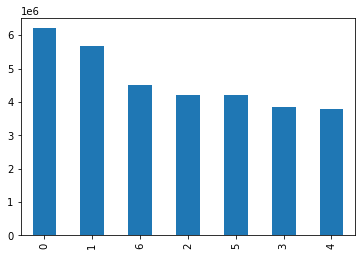

In [8]:
# create bar chart for order_day_of_week column
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

# the observations are ordered from largest to smallest

<AxesSubplot:>

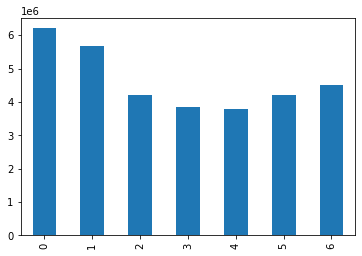

In [9]:
# to change the order based on the index order
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

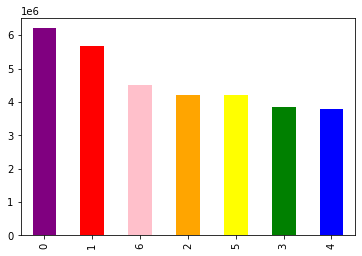

In [10]:
# create bar chart with colour
# there are many other argument to add to plot.bar() function to change and tweak the final output of the chart
ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

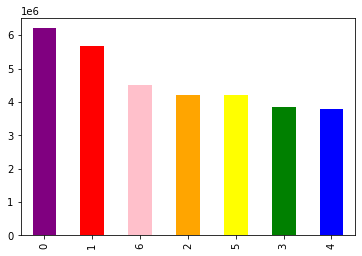

In [12]:
# save the bar chart within the bar object
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# to access its we can call bar.figure

In [14]:
# export outside Jupiter
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

## Histograms & Scatterplot
- Histogram is good for continuous data as it shows the density of continuous variable
- Scatterplot to investigate the relationship between 2 variables / to visualize the distribution of data points in order to identify any outliers

<AxesSubplot:ylabel='Frequency'>

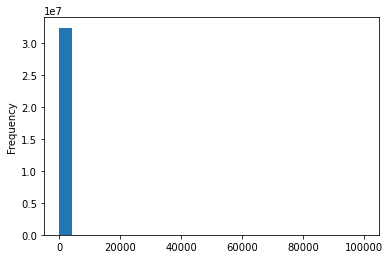

In [15]:
# create histogram for prices column
ords_prods_merge['prices'].plot.hist(bins=25)

In [17]:
# Check the prices column using describe as we should have gotten 25 bars (one for each bin)
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [18]:
# check mean
ords_prods_merge['prices'].mean()

11.980225638467232

In [19]:
# check median
ords_prods_merge['prices'].median()

7.4

In [20]:
# check max value
ords_prods_merge['prices'].max()

# the max value yields a strange result as how could an item cost $99,999?
# this must be due to data corruption or special balue within the data, causing a breaking in the histogram that having most values between 7 and 12
# This extreme value force the histogram to push all the small values into one bar and the extreme value in another bar, but since it is so tiny, we can't see

99999.0

In [ ]:
# create scatterplots using 'matplotlib'
def scatterplot(x_data, y_data, x_label = "", y_label = "", title = "", color = "r", yscale_log = False)

# create the plot object
_, ax = plt.subplots()

# plot the data, set the size(s), color and transperancy (alpha)
# of the points
ax.scatter(x_data, y_data, s=10, color = cp;pr, alpha = 0/75)

if yscale_log == True
    ax.set_yscale('log')

# Label the axes and provide a title
ax.set_title(title)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f

x_data: the x-axis data.
y_data: the y-axis data.
x_label: the label for the x-axis (optional, defaults to an empty string).
y_label: the label for the y-axis (optional, defaults to an empty string).
title: the title of the plot (optional, defaults to an empty string).
color: the color of the points in the plot (optional, defaults to "r", which is short for red).
yscale_log: whether or not to use a logarithmic scale on the y-axis (optional, defaults to False).

<AxesSubplot:xlabel='prices', ylabel='prices'>

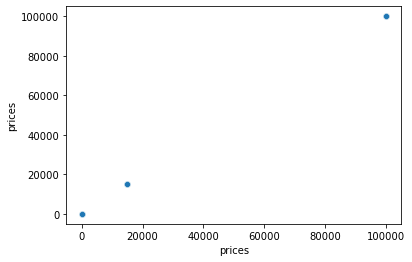

In [21]:
# use scatterplots to plot "prices" column against itself to reveal whether any outliers present
# scatterplots are created using scatterplot() function which is included in seaborn library (imported as sns)
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

# The mean of the prices is around 12, so you would expect the data points to be distributed somewhere around this number.
# Howver, there are two data points that far beyond values that we would expect, values closed to 20,000 and even 100,000

In [37]:
# run exploratory checks
# first, determine any values above certain treshold in the data
ords_prods_merge.loc[ords_prods_merge['prices'] > 100,['order_id','user_id','product_id', 'product_name','prices']]

# from the output, you can see there are 5,127 rows with outlier observations (price > $100)
# at the top of prices column, we can see another off value of $14,900, which correspondence to the second unexplainable point in the scatterplot
# we can assume that it's the $14,900 and $99,999 values are skewing the charts 

,order_id,user_id,product_id,product_name,prices
10030345,912404,17,21553,Lowfat 2% Milkfat Cottage Cheese,14900.0
10030346,603376,17,21553,Lowfat 2% Milkfat Cottage Cheese,14900.0
10030347,3264360,135,21553,Lowfat 2% Milkfat Cottage Cheese,14900.0
10030348,892534,135,21553,Lowfat 2% Milkfat Cottage Cheese,14900.0
10030349,229704,342,21553,Lowfat 2% Milkfat Cottage Cheese,14900.0
...,...,...,...,...,...
29166209,2249946,204099,33664,2 % Reduced Fat Milk,99999.0
29166210,2363282,204099,33664,2 % Reduced Fat Milk,99999.0
29166211,3181945,204395,33664,2 % Reduced Fat Milk,99999.0
29166212,2486215,205227,33664,2 % Reduced Fat Milk,99999.0


In [38]:
# mark the outliers as missing since they don't make sense in terms of the other values in the column
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [39]:
# check the max value of 'prices' column
ords_prods_merge['prices'].max()

25.0

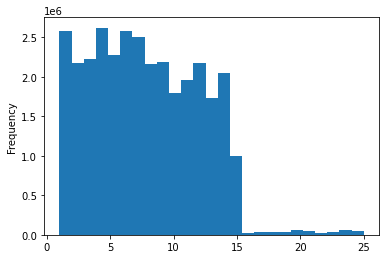

In [41]:
# retry the histogram
hist = ords_prods_merge['prices'].plot.hist(bins=25)

# the result makes more sense as most products are between $1 and $15, while a few are higher priced at $15 to $25 

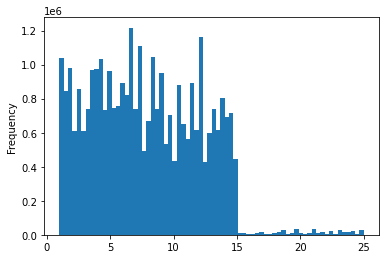

In [42]:
# increase the level of granularity to bins = 70
hist_2 = ords_prods_merge['prices'].plot.hist(bins=70)

In [43]:
# export outside Jupiter
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_dow.png'))

## Line Charts
Line charts are traditionally used to visualize the development of a characteristic over time.

## Sampling Data

In [45]:
# create random samples
# split the dataframe into two samples with the same distribution, for instance an 80/20 or 70/30 split.
# in a 70/30 split, the 30 percent sample would statistically resemble the 70 percent sample but contain less rows
# create list of random floating numbers between 0 and 1 (with 1 representing 100 percent of the dataframe)
# any rows who assigned number is less than 0.7 are placed in one sample, while any rows who assigned number is greater than 0.7 are placed in the other, effectively splitting dataframe into two dataframes at a 70/30 ratio.

# set the seed for the random number generator
np.random.seed(4)

In [ ]:
# create a list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [46]:
# split the dataframe into two samples
# strore 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [ ]:
# store 30% of the sample in dataframe small
small = ords_prods_merge[~dev]

In [47]:
# check the number of rows for dataframe 
len(ords_prods_merge)

32404859

In [48]:
# check the number of rows for dataframe 
len(big) + len(small)

32404859

In [49]:
# reduce the samples to only those necessary columns
df_2 = small [['order_day_of_week', 'prices']]

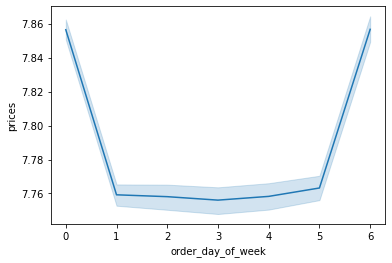

In [52]:
# create line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y ='prices')

# The blue line represents how prices differ depending on the day of the week. 
# The peaks on days zero and six mean that most money is spent on Saturday and Sunday. 
# This makes sense as people usually stock up on things over the weekend.

In [53]:
# create line chart from entire dataframe, reducing the column to only order_day_of_week and prices
df_4 = ords_prods_merge[['order_day_of_week', 'prices']]

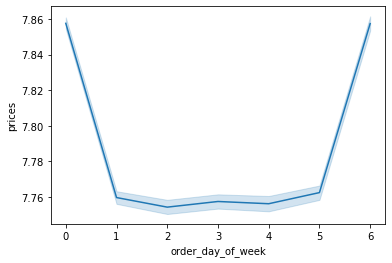

In [54]:
line_2 = sns.lineplot(data = df_4, x = 'order_day_of_week', y = 'prices')

# the line chart looks very similar to the shape of the line chart of the subset. 
# Therefore, we can conclude that the subset is an accurate representation of the entire dataframe

In [55]:
# export outside Jupiter
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_dow.png'))